In [67]:
#importing dependencies
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB


from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re 
from gensim.models import Word2Vec
from tqdm import tqdm

In [3]:
dataset=pd.read_excel('rating_dataset.xlsx')

In [4]:
dataset.head()

,Unnamed: 0,Unnamed: 0.1,Rating,Summary,Full Review,gadget
0,0,1,1,Absolute rubbish!,Gets Extremely overheated(45Deg Celsius)after ...,phones
1,1,2,1,Terrible product,Not happy...because as per bill the price is 5...,phones
2,2,3,1,Worthless,not worth the price,phones
3,3,4,1,Horrible,The phone has damaged my sim on 1st insertion ...,phones
4,4,5,1,Did not meet expectations,Worst seller ever,phones


In [5]:
dataset.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)

In [6]:
dataset.head()

,Rating,Summary,Full Review,gadget
0,1,Absolute rubbish!,Gets Extremely overheated(45Deg Celsius)after ...,phones
1,1,Terrible product,Not happy...because as per bill the price is 5...,phones
2,1,Worthless,not worth the price,phones
3,1,Horrible,The phone has damaged my sim on 1st insertion ...,phones
4,1,Did not meet expectations,Worst seller ever,phones


In [7]:
dataset.shape

(28005, 4)

In [8]:
dataset.nunique()

Rating             5
Summary         1204
Full Review    19641
gadget             5
dtype: int64

In [9]:
dataset.isnull().sum()

Rating         0
Summary        4
Full Review    0
gadget         0
dtype: int64

In [10]:
dataset.dropna(inplace=True)

In [11]:
dataset.isnull().sum()

Rating         0
Summary        0
Full Review    0
gadget         0
dtype: int64

In [12]:
dataset.shape

(28001, 4)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28001 entries, 0 to 28004
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rating       28001 non-null  int64 
 1   Summary      28001 non-null  object
 2   Full Review  28001 non-null  object
 3   gadget       28001 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [14]:
dataset['length_of_uncleaned_review']=dataset['Full Review'].str.len()
dataset.head(6)

,Rating,Summary,Full Review,gadget,length_of_uncleaned_review
0,1,Absolute rubbish!,Gets Extremely overheated(45Deg Celsius)after ...,phones,144
1,1,Terrible product,Not happy...because as per bill the price is 5...,phones,117
2,1,Worthless,not worth the price,phones,19
3,1,Horrible,The phone has damaged my sim on 1st insertion ...,phones,310
4,1,Did not meet expectations,Worst seller ever,phones,17
5,1,Did not meet expectations,Packing was so bad not properly packed,phones,38


In [15]:
dataset['length_of_uncleaned_summary']=dataset['Summary'].str.len()
dataset.head(6)

,Rating,Summary,Full Review,gadget,length_of_uncleaned_review,length_of_uncleaned_summary
0,1,Absolute rubbish!,Gets Extremely overheated(45Deg Celsius)after ...,phones,144,17
1,1,Terrible product,Not happy...because as per bill the price is 5...,phones,117,16
2,1,Worthless,not worth the price,phones,19,9
3,1,Horrible,The phone has damaged my sim on 1st insertion ...,phones,310,8
4,1,Did not meet expectations,Worst seller ever,phones,17,25
5,1,Did not meet expectations,Packing was so bad not properly packed,phones,38,25


# DATA PREPROCESSING

In [16]:
def decontracted(phrase):
    phrase = re.sub(r"’","'",phrase)
    phrase = re.sub(r"”",'"',phrase)
    phrase = re.sub(r"“",'"',phrase)
    phrase = re.sub(r"n\'t"," not",phrase)
    phrase = re.sub(r"\'re"," are",phrase)
    phrase = re.sub(r"\'s","s",phrase)
    phrase = re.sub(r"\'d"," would",phrase)
    phrase = re.sub(r"\'ll"," will",phrase)
    phrase = re.sub(r"\'t"," not",phrase)
    phrase = re.sub(r"\'ve"," have",phrase)
    phrase = re.sub(r"\'m"," am",phrase)
    return phrase

In [17]:
newset=dataset.copy()

In [18]:
cleaned_review=[]
lemma= WordNetLemmatizer()
punch=string.punctuation
stop_words=stopwords.words('english')
stop_words.remove('not')
for i in tqdm(range(0,len(newset['Full Review']))):
    x=newset['Full Review'].iloc[i]
    x=x.lower()
    sent=decontracted(x)
    sent=re.sub('[^a-z]+',' ',sent)
    y=[]
    for word in nltk.word_tokenize(sent):
        if word not in punch:
            if word not in stop_words:
                word=lemma.lemmatize(word,pos='v')
                y.append(word)
    cleaned_review.append(" ".join(y))

100%|██████████████████████████████████████████████████████████████████████████| 28001/28001 [00:05<00:00, 5537.65it/s]


In [19]:
newset['cleaned_review']=cleaned_review

In [20]:
newset.head()

,Rating,Summary,Full Review,gadget,length_of_uncleaned_review,length_of_uncleaned_summary,cleaned_review
0,1,Absolute rubbish!,Gets Extremely overheated(45Deg Celsius)after ...,phones,144,17,get extremely overheat deg celsius play even m...
1,1,Terrible product,Not happy...because as per bill the price is 5...,phones,117,16,not happy per bill price k pay k flipkart team...
2,1,Worthless,not worth the price,phones,19,9,not worth price
3,1,Horrible,The phone has damaged my sim on 1st insertion ...,phones,310,8,phone damage sim st insertion sim simultaneous...
4,1,Did not meet expectations,Worst seller ever,phones,17,25,worst seller ever


In [21]:
newset['cleaned_review_length']=newset.cleaned_review.str.len()
newset.head(6)

,Rating,Summary,Full Review,gadget,length_of_uncleaned_review,length_of_uncleaned_summary,cleaned_review,cleaned_review_length
0,1,Absolute rubbish!,Gets Extremely overheated(45Deg Celsius)after ...,phones,144,17,get extremely overheat deg celsius play even m...,100
1,1,Terrible product,Not happy...because as per bill the price is 5...,phones,117,16,not happy per bill price k pay k flipkart team...,63
2,1,Worthless,not worth the price,phones,19,9,not worth price,15
3,1,Horrible,The phone has damaged my sim on 1st insertion ...,phones,310,8,phone damage sim st insertion sim simultaneous...,214
4,1,Did not meet expectations,Worst seller ever,phones,17,25,worst seller ever,17
5,1,Did not meet expectations,Packing was so bad not properly packed,phones,38,25,pack bad not properly pack,26


In [22]:
cleaned_Summary=[]
lemma= WordNetLemmatizer()
punch=string.punctuation
stop_words=stopwords.words('english')

for i in tqdm(range(0,len(newset['Summary']))):
    x=newset['Summary'].iloc[i]
    x=x.lower()
    sent=decontracted(x)
    sent=re.sub('[^a-z]+',' ',sent)
    y=[]
    for word in nltk.word_tokenize(sent):
        if word not in punch:
            if word not in stop_words:
                word=lemma.lemmatize(word,pos='v')
                y.append(word)
    cleaned_Summary.append(" ".join(y))

100%|█████████████████████████████████████████████████████████████████████████| 28001/28001 [00:02<00:00, 11816.58it/s]


In [23]:
newset['cleaned_summary']=cleaned_Summary

In [24]:
newset.head()

,Rating,Summary,Full Review,gadget,length_of_uncleaned_review,length_of_uncleaned_summary,cleaned_review,cleaned_review_length,cleaned_summary
0,1,Absolute rubbish!,Gets Extremely overheated(45Deg Celsius)after ...,phones,144,17,get extremely overheat deg celsius play even m...,100,absolute rubbish
1,1,Terrible product,Not happy...because as per bill the price is 5...,phones,117,16,not happy per bill price k pay k flipkart team...,63,terrible product
2,1,Worthless,not worth the price,phones,19,9,not worth price,15,worthless
3,1,Horrible,The phone has damaged my sim on 1st insertion ...,phones,310,8,phone damage sim st insertion sim simultaneous...,214,horrible
4,1,Did not meet expectations,Worst seller ever,phones,17,25,worst seller ever,17,meet expectations


In [25]:
print('Average Full Review Length : ',newset.length_of_uncleaned_review.mean())
print('Average Cleaned Full Review Length : ',newset.cleaned_review_length.mean())

Average Full Review Length :  68.61097817935074
Average Cleaned Full Review Length :  46.116745830506055


In [26]:
newset.describe()

,Rating,length_of_uncleaned_review,length_of_uncleaned_summary,cleaned_review_length
count,28001.000000,28001.000000,28001.000000,28001.000000
mean,2.988536,68.610978,13.139352,46.116746
std,1.409018,97.868841,6.847054,61.588233
min,1.000000,1.000000,1.000000,0.000000
25%,2.000000,12.000000,9.000000,11.000000
50%,3.000000,30.000000,12.000000,22.000000
75%,4.000000,79.000000,17.000000,54.000000
max,5.000000,510.000000,142.000000,417.000000


In [27]:
newset.loc[newset['length_of_uncleaned_review'].between(0,10), 'full_review_word_range'] = 10
newset.loc[newset['length_of_uncleaned_review'].between(11,30), 'full_review_word_range'] = 30
newset.loc[newset['length_of_uncleaned_review'].between(31,100), 'full_review_word_range'] = 100
newset.loc[newset['length_of_uncleaned_review'].between(101,600), 'full_review_word_range'] = 200

In [28]:
newset.head()

,Rating,Summary,Full Review,gadget,length_of_uncleaned_review,length_of_uncleaned_summary,cleaned_review,cleaned_review_length,cleaned_summary,full_review_word_range
0,1,Absolute rubbish!,Gets Extremely overheated(45Deg Celsius)after ...,phones,144,17,get extremely overheat deg celsius play even m...,100,absolute rubbish,200.0
1,1,Terrible product,Not happy...because as per bill the price is 5...,phones,117,16,not happy per bill price k pay k flipkart team...,63,terrible product,200.0
2,1,Worthless,not worth the price,phones,19,9,not worth price,15,worthless,30.0
3,1,Horrible,The phone has damaged my sim on 1st insertion ...,phones,310,8,phone damage sim st insertion sim simultaneous...,214,horrible,200.0
4,1,Did not meet expectations,Worst seller ever,phones,17,25,worst seller ever,17,meet expectations,30.0


# DATA VISUALIZATION

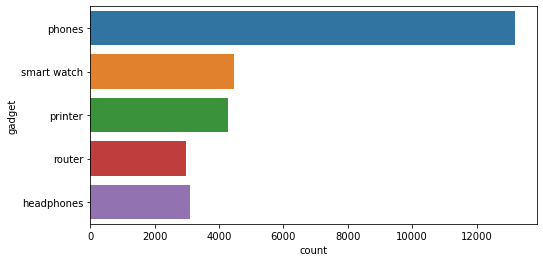

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(y='gadget', data=newset)
plt.show()

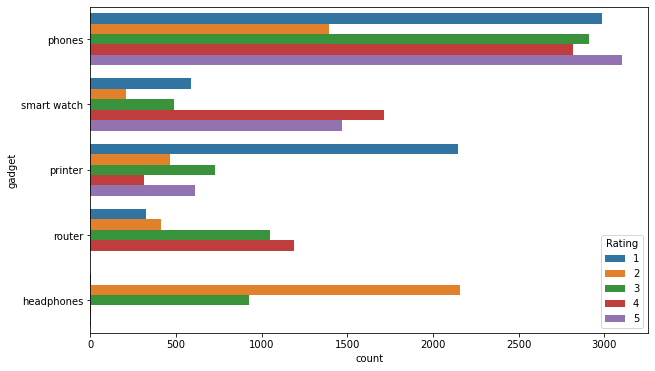

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(y='gadget',hue='Rating', data=newset)
plt.show()

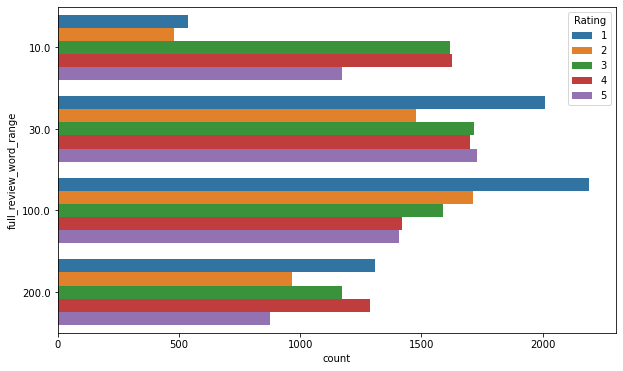

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(y='full_review_word_range', hue= 'Rating', data=newset)
plt.show()

<AxesSubplot:xlabel='length_of_uncleaned_review', ylabel='Count'>

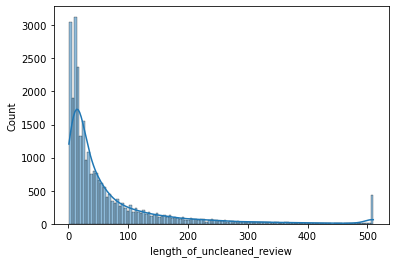

In [32]:
sns.histplot(data = newset['length_of_uncleaned_review'], kde = True)

<AxesSubplot:xlabel='cleaned_review_length', ylabel='Count'>

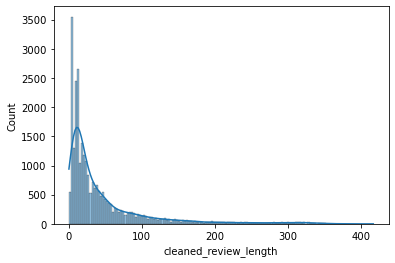

In [33]:
sns.histplot(data = newset['cleaned_review_length'], kde = True)

100%|███████████████████████████████████████████████████████████████████████████| 28001/28001 [00:30<00:00, 903.66it/s]


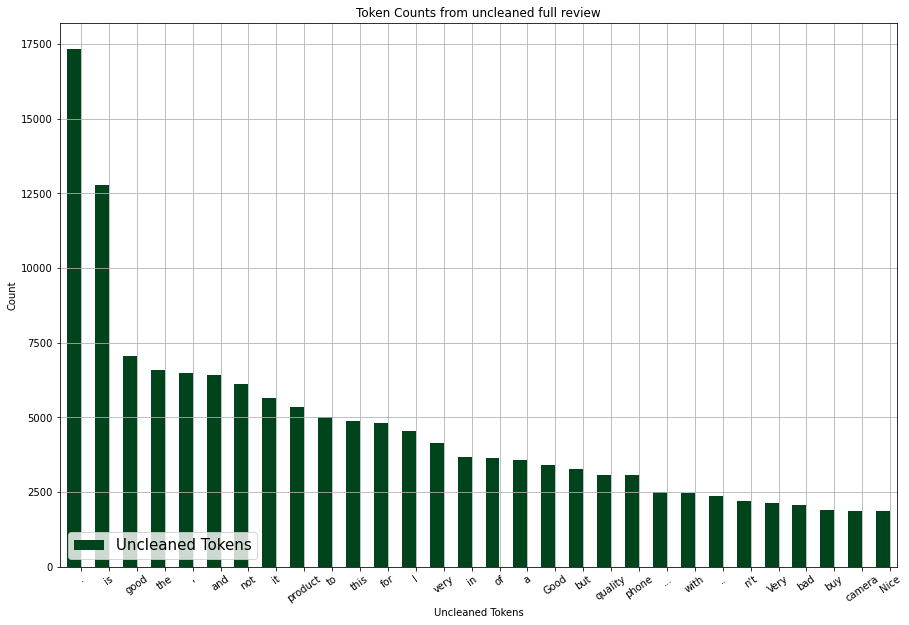

In [34]:
full_review_words_uncleaned=""
for i in tqdm(range(0,len(newset['Full Review']))):
    y=newset['Full Review'].iloc[i]
    full_review_words_uncleaned=full_review_words_uncleaned+" "+y

uncleaned_tokens = word_tokenize(full_review_words_uncleaned)
uncleaned_tokenized_counts = Counter(uncleaned_tokens)
df__uncleaned_tokenized = pd.DataFrame.from_dict(uncleaned_tokenized_counts, orient="index").reset_index()

df__uncleaned_tokenized.sort_values(by=0, ascending=False, inplace=True)
df__uncleaned_tokenized[:30].plot(kind="bar",x="index", orientation="vertical", figsize=(15,10), xlabel="Uncleaned Tokens", ylabel="Count", colormap="Greens_r", table=False, grid=True, fontsize=10, rot=35, position=1, title="Token Counts from uncleaned full review", legend=True).legend(["Uncleaned Tokens"], loc="lower left", prop={"size":15})

100%|█████████████████████████████████████████████████████████████████████████| 28001/28001 [00:01<00:00, 14714.81it/s]


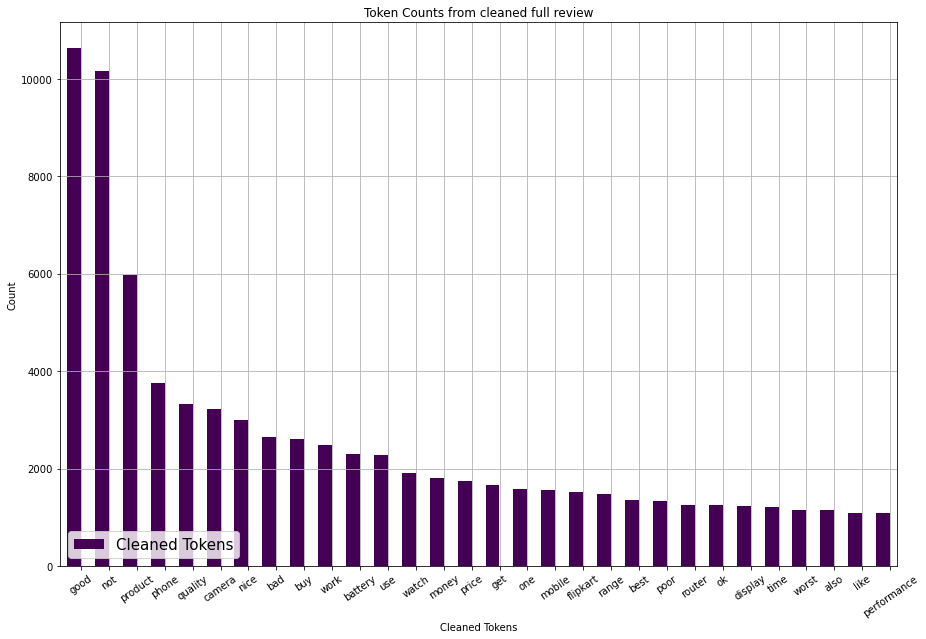

In [35]:
full_review_words=""
for i in tqdm(range(0,len(newset['cleaned_review']))):
    y=newset['cleaned_review'].iloc[i]
    full_review_words=full_review_words+" "+y
    
cleaned_tokens = word_tokenize(full_review_words)
cleaned_tokenized_counts = Counter(cleaned_tokens)
df__cleaned_tokenized = pd.DataFrame.from_dict(cleaned_tokenized_counts, orient="index").reset_index()

df__cleaned_tokenized.sort_values(by=0, ascending=False, inplace=True)
df__cleaned_tokenized[:30].plot(kind="bar",x="index", orientation="vertical", figsize=(15,10), xlabel="Cleaned Tokens", ylabel="Count", colormap="viridis", table=False, grid=True, fontsize=10, rot=35, position=1, title="Token Counts from cleaned full review", legend=True).legend(["Cleaned Tokens"], loc="lower left", prop={"size":15})

In [36]:
dummy_set=pd.get_dummies(newset['Rating'])
merged=pd.concat([dummy_set,newset],axis='columns')

In [37]:
def top_words(col):
    phrase=merged['cleaned_review'][merged[col]==1]
    phrase_df=pd.DataFrame(phrase)
    phrase_df = phrase_df.reset_index()
    all_words_cleaned=""
    for i in tqdm(range(0,len(phrase_df.cleaned_review))):
        y=phrase_df.cleaned_review[i]
        all_words_cleaned=all_words_cleaned+" "+y

    tokens = word_tokenize(all_words_cleaned)
    tokenized_counts = Counter(tokens)
    df_tokenized = pd.DataFrame.from_dict(tokenized_counts, orient="index").reset_index()
    df_tokenized.sort_values(by=0, ascending=False, inplace=True)
    df_tokenized[:30].plot(kind="bar",x="index", orientation="vertical", figsize=(15,10), xlabel=str(col)+" star Rating", ylabel="Count", colormap="viridis", table=False, grid=True, fontsize=10, rot=35, position=1, title="Token Counts from "+str(col)+" star cleaned_review", legend=True).legend([str(col)+" Star rating"], loc="lower left", prop={"size":15})

100%|███████████████████████████████████████████████████████████████████████████| 5185/5185 [00:00<00:00, 83854.38it/s]


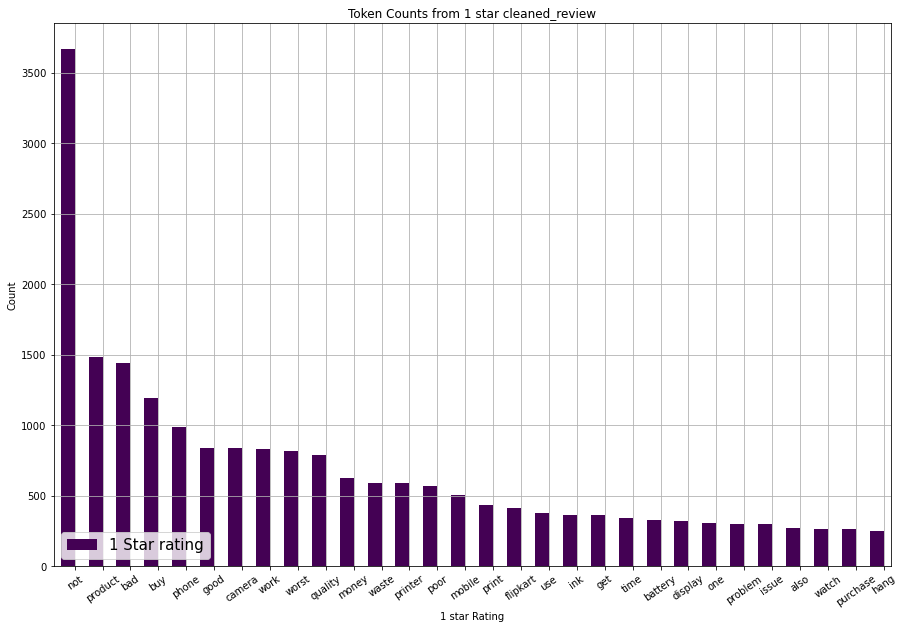

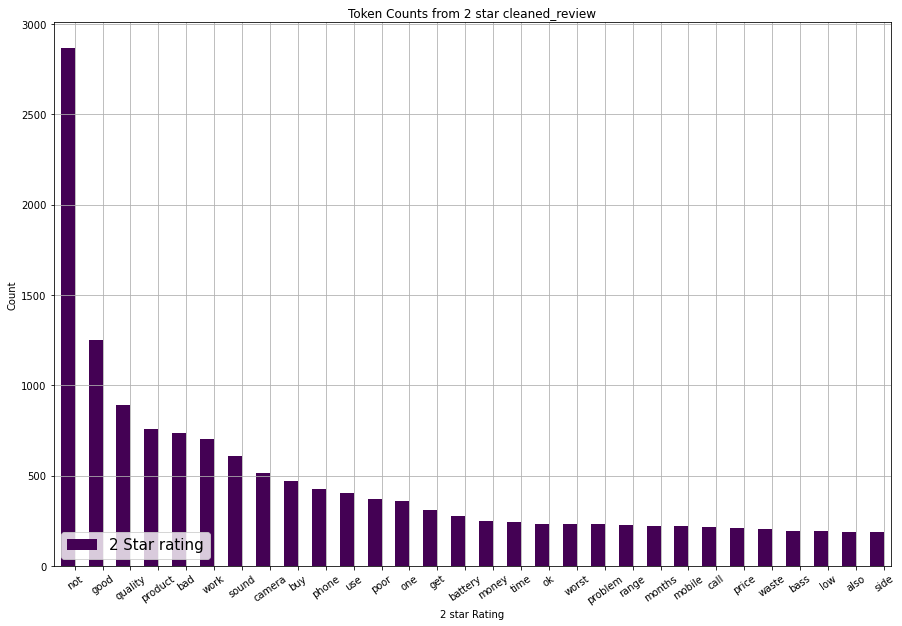

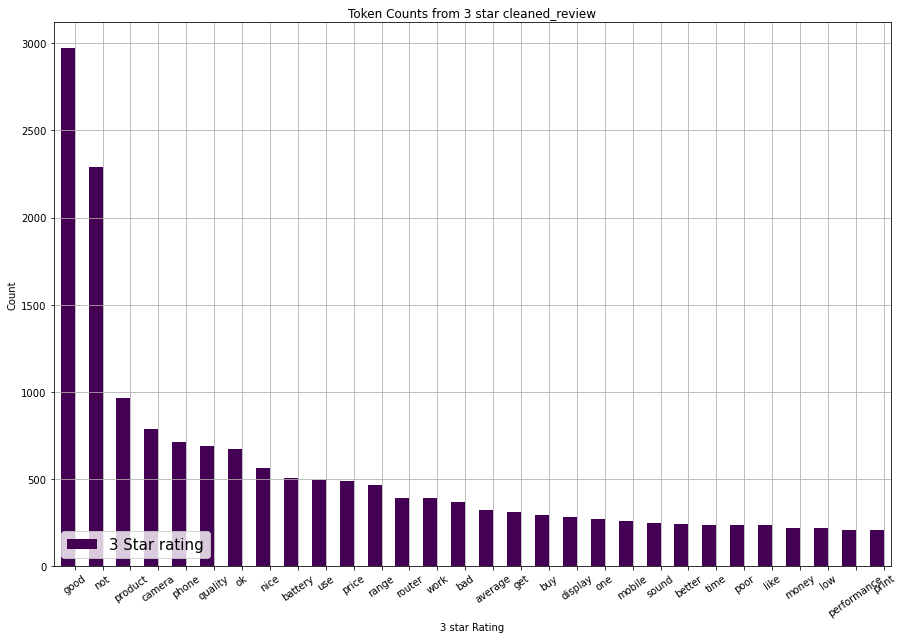

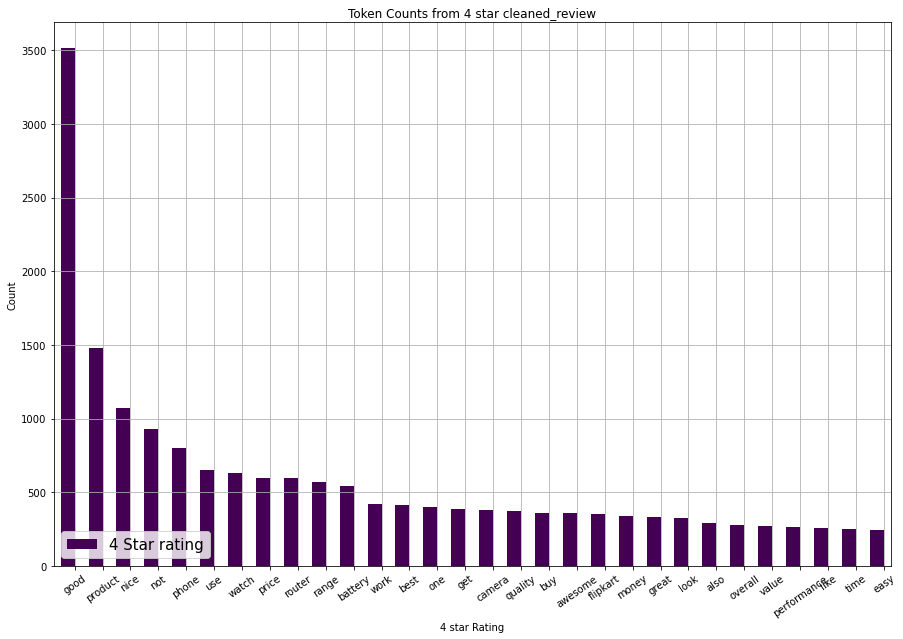

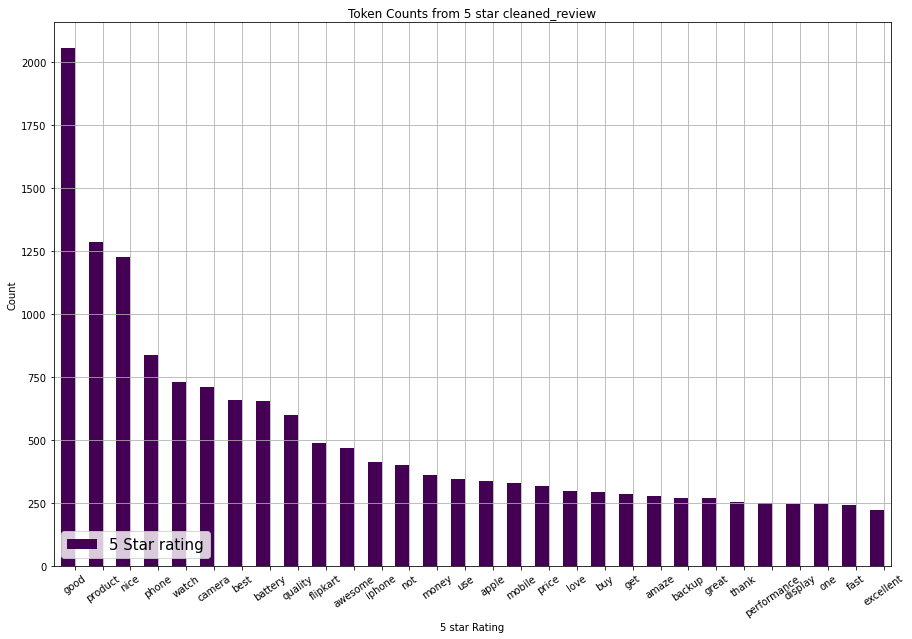

In [38]:
cols=[1,2,3,4,5]
for col in cols:
    top_words(col)

In [39]:
def top_words2(col):
    phrase=merged['cleaned_summary'][merged[col]==1]
    phrase_df=pd.DataFrame(phrase)
    phrase_df = phrase_df.reset_index()
    all_words_cleaned=""
    for i in tqdm(range(0,len(phrase_df.cleaned_summary))):
        y=phrase_df.cleaned_summary[i]
        all_words_cleaned=all_words_cleaned+" "+y

    tokens = word_tokenize(all_words_cleaned)
    tokenized_counts = Counter(tokens)
    df_tokenized = pd.DataFrame.from_dict(tokenized_counts, orient="index").reset_index()
    df_tokenized.sort_values(by=0, ascending=False, inplace=True)
    df_tokenized[:30].plot(kind="bar",x="index", orientation="vertical", figsize=(15,10), xlabel=str(col)+" star Rating Summary", ylabel="Count", colormap="viridis", table=False, grid=True, fontsize=10, rot=35, position=1, title="Token Counts from "+str(col)+" star summary", legend=True).legend([str(col)+" Star rating summary"], loc="lower left", prop={"size":15})

100%|██████████████████████████████████████████████████████████████████████████| 5185/5185 [00:00<00:00, 129972.19it/s]


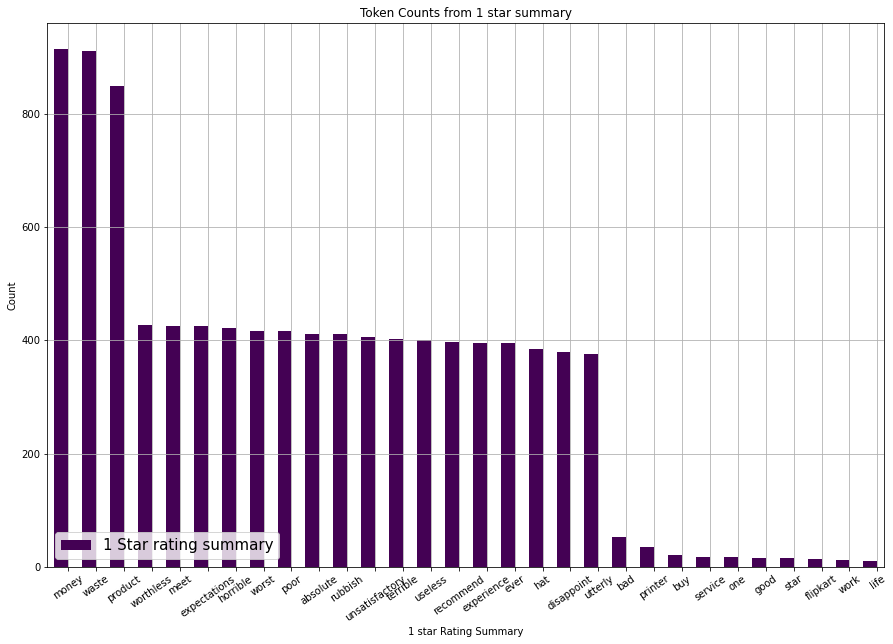

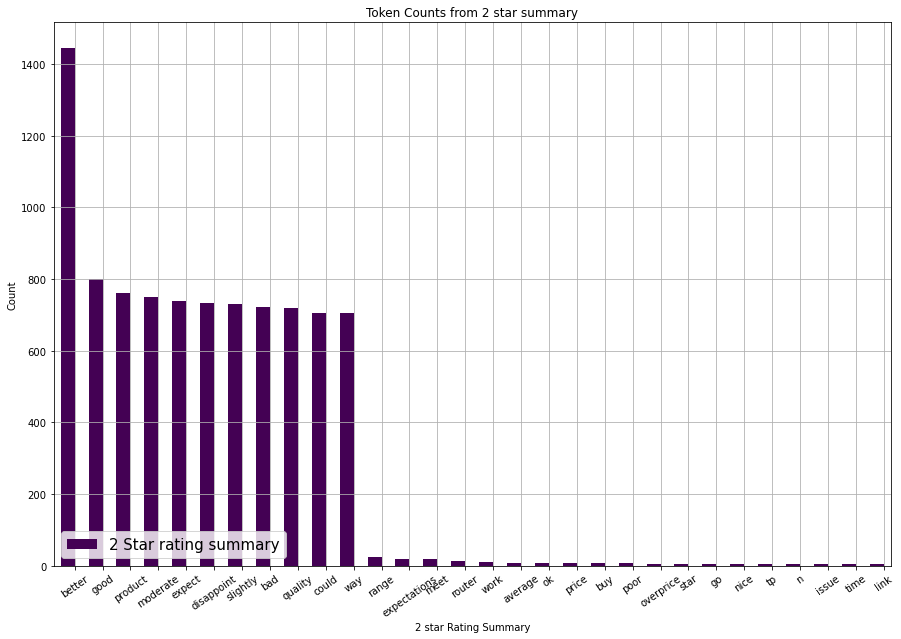

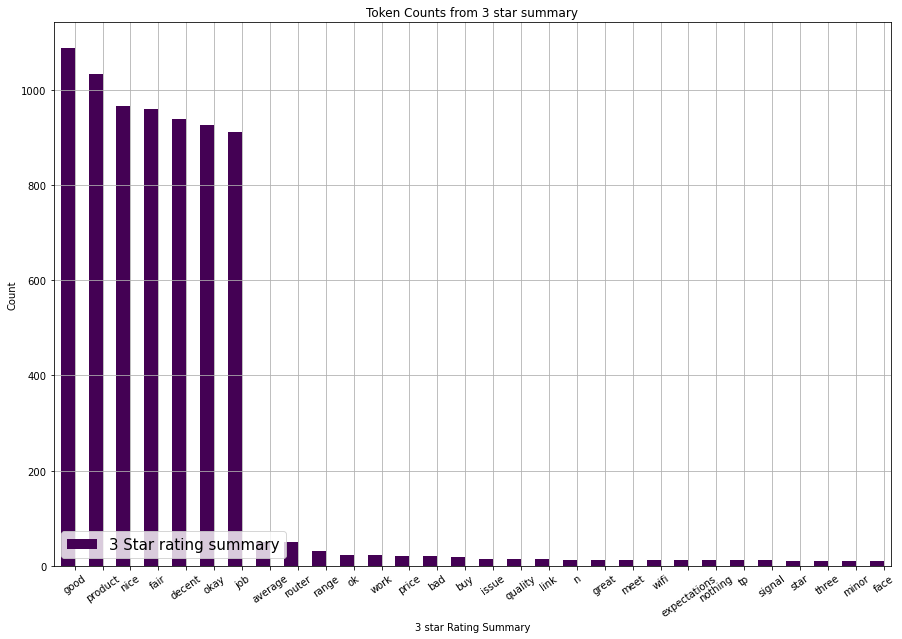

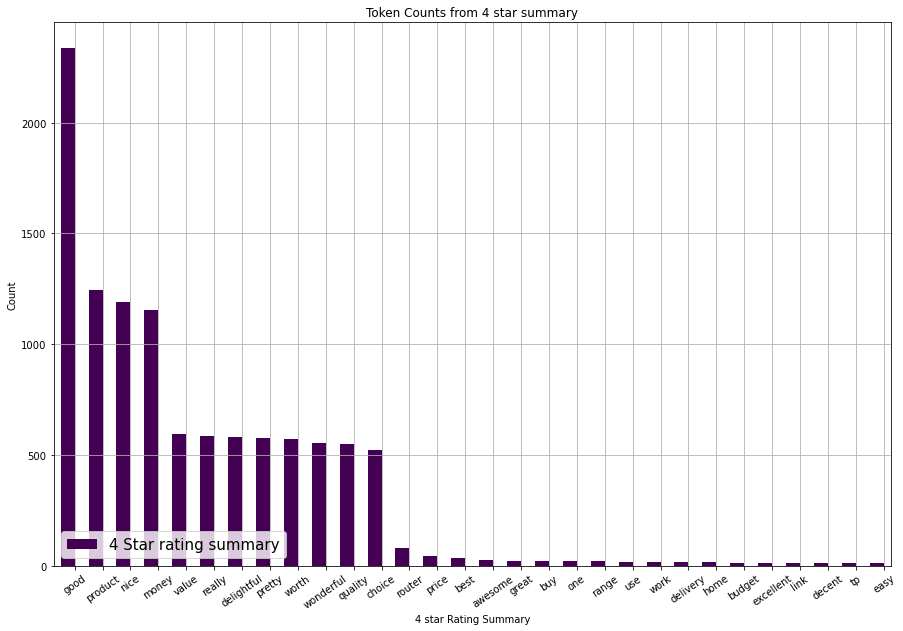

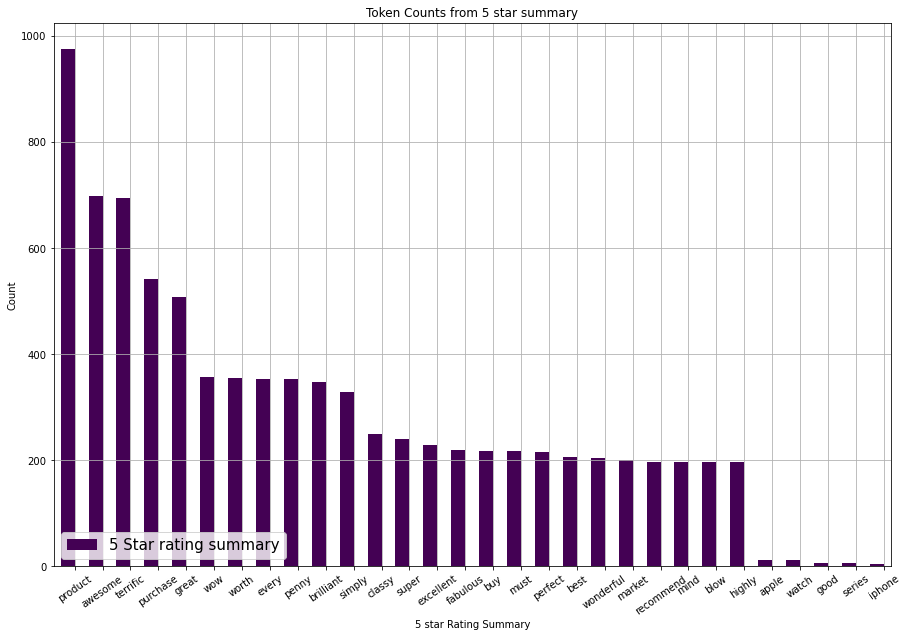

In [40]:
cols=[1,2,3,4,5]
for col in cols:
    top_words2(col)

**Summary of Observation:**
1.	Dataset contains 4 null values.
2.	Word length of Summary is minimum
3.	After removing unnecessary columns and null values the shape of the dataset is 28001 rows and 4 columns.
4.	The dataset is multi-class type. It contains 5 different class which indicate rating of the full review.
5.	Summary has 1204 unique type and the data scrapped is of 5 different gadgets categories reviews.
6.	Only Rating column is in numerical form rest all columns are in text format.
7.	Average length of uncleaned review is 68.6 words where as average length of cleaned review is 44.6 words.
8.	Majority of the data scrapped is of phone electronic followed by watches and printers respectively. Router data is minor in the dataset.
9.	Router has the minimum one-star rating where as phones have maximum five-star ratings. Printers have the least five -star rating.
10.	Review with more word count has less rating comparatively.
11.	Good and product are most used words in the review.
12.	Product, bad and poor are the most used words for one and two-star rating.
13.	Good is almost common and top most used word in all the ratings.
14.	Nice, quality, awesome, product some of the top words in 4 and 5-star ratings.
15.	Money, waste and worthless are top most used in 1-star summary.
16.	Awesome, terrific are top words used in 5-star summary.


# MODEL TRAINING AND TEST

In [41]:
newset['Rating']=newset['Rating']-1

In [42]:
newset.Rating.value_counts()

2    6098
0    6045
3    6036
4    5185
1    4637
Name: Rating, dtype: int64

In [43]:
X=newset['cleaned_review']
y=newset['Rating']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,stratify=y)

In [45]:
y_train.value_counts()

2    4878
0    4836
3    4829
4    4148
1    3709
Name: Rating, dtype: int64

In [46]:
y_test.value_counts()

2    1220
0    1209
3    1207
4    1037
1     928
Name: Rating, dtype: int64

In [47]:
clf2=LinearSVC()
tfidf=TfidfVectorizer()
pipe2=make_pipeline(tfidf,clf2)
parameters={}
parameters['tfidfvectorizer__max_df']= [0.25, 0.5, 0.75]
parameters['tfidfvectorizer__ngram_range']= [(1, 1), (1, 2), (1, 3)]
parameters['linearsvc__C']=[100, 10, 1.0, 0.1, 0.01]
parameters['linearsvc__penalty'] = ['l2']
parameters['linearsvc__multi_class']=['ovr', 'crammer_singer']

In [48]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid2=rs(pipe2,parameters,cv=cv,scoring='accuracy',verbose=10)
grid2.fit(X_train,y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
[CV 1/30; 1/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 1/30; 1/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.521 total time=   0.1s
[CV 2/30; 1/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 2/30; 1/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.546 total time=   0.1s
[CV 3/30; 1/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 3/30; 1/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, 

[CV 25/30; 1/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.533 total time=   0.1s
[CV 26/30; 1/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 26/30; 1/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.517 total time=   0.1s
[CV 27/30; 1/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 27/30; 1/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.530 total time=   0.1s
[CV 28/30; 1/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=

[CV 18/30; 2/10] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.505 total time=   0.4s
[CV 19/30; 2/10] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 19/30; 2/10] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.492 total time=   0.4s
[CV 20/30; 2/10] START linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 20/30; 2/10] END linearsvc__C=0.01, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.500 total time=   0.4s
[CV 21/30; 2/10] START linearsvc__C=0.01, linearsvc__multi_cla

[CV 11/30; 3/10] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 1);, score=0.463 total time=   7.5s
[CV 12/30; 3/10] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 1)
[CV 12/30; 3/10] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 1);, score=0.482 total time=   8.3s
[CV 13/30; 3/10] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 1)
[CV 13/30; 3/10] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 1);, score=0.470 total time=   7.7s
[CV 14/30; 3/10] START linearsvc__C=1.0, linearsvc__multi_clas

[CV 4/30; 4/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.518 total time=   0.3s
[CV 5/30; 4/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 5/30; 4/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.506 total time=   0.3s
[CV 6/30; 4/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 6/30; 4/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.510 total time=   0.3s
[CV 7/30; 4/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0

[CV 28/30; 4/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.531 total time=   0.3s
[CV 29/30; 4/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 29/30; 4/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.519 total time=   0.3s
[CV 30/30; 4/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 30/30; 4/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.521 total time=   0.3s
[CV 1/30; 5/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max

[CV 22/30; 5/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 2);, score=0.543 total time=   0.3s
[CV 23/30; 5/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 2)
[CV 23/30; 5/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 2);, score=0.528 total time=   0.3s
[CV 24/30; 5/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 2)
[CV 24/30; 5/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 2);, score=0.520 total time=   0.3s
[CV 25/30; 5/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=

[CV 16/30; 6/10] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.562 total time=   0.7s
[CV 17/30; 6/10] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3)
[CV 17/30; 6/10] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.550 total time=   0.7s
[CV 18/30; 6/10] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3)
[CV 18/30; 6/10] END linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.556 total time=   0.7s
[CV 19/30; 6/10] START linearsvc__C=0.1, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0

[CV 10/30; 7/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1);, score=0.517 total time=   0.1s
[CV 11/30; 7/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1)
[CV 11/30; 7/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1);, score=0.531 total time=   0.1s
[CV 12/30; 7/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1)
[CV 12/30; 7/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1);, score=0.528 total time=   0.1s
[CV 13/30; 7/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__ma

[CV 4/30; 8/10] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3);, score=0.528 total time=   2.8s
[CV 5/30; 8/10] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3)
[CV 5/30; 8/10] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3);, score=0.495 total time=  46.6s
[CV 6/30; 8/10] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3)
[CV 6/30; 8/10] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3);, score=0.479 total time=   6.6s
[CV 7/30; 8/10] START linearsvc__C=1.0, linearsvc__multi_class=cram

[CV 27/30; 8/10] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3);, score=0.523 total time=   3.0s
[CV 28/30; 8/10] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3)
[CV 28/30; 8/10] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3);, score=0.472 total time=  13.8s
[CV 29/30; 8/10] START linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3)
[CV 29/30; 8/10] END linearsvc__C=1.0, linearsvc__multi_class=crammer_singer, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3);, score=0.485 total time=   3.2s
[CV 30/30; 8/10] START linearsvc__C=1.0, linearsvc__multi_clas

[CV 21/30; 9/10] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 1);, score=0.500 total time=   0.3s
[CV 22/30; 9/10] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 1)
[CV 22/30; 9/10] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 1);, score=0.506 total time=   0.3s
[CV 23/30; 9/10] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 1)
[CV 23/30; 9/10] END linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 1);, score=0.495 total time=   0.2s
[CV 24/30; 9/10] START linearsvc__C=1.0, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0

[CV 15/30; 10/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3);, score=0.522 total time=   0.7s
[CV 16/30; 10/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3)
[CV 16/30; 10/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3);, score=0.523 total time=   0.7s
[CV 17/30; 10/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3)
[CV 17/30; 10/10] END linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3);, score=0.510 total time=   0.7s
[CV 18/30; 10/10] START linearsvc__C=0.01, linearsvc__multi_class=ovr, linearsvc__penalty=l2, tfidfvectoriz

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=Pipeline(steps=[('tfidfvectorizer',
                                              TfidfVectorizer()),
                                             ('linearsvc', LinearSVC())]),
                   param_distributions={'linearsvc__C': [100, 10, 1.0, 0.1,
                                                         0.01],
                                        'linearsvc__multi_class': ['ovr',
                                                                   'crammer_singer'],
                                        'linearsvc__penalty': ['l2'],
                                        'tfidfvectorizer__max_df': [0.25, 0.5,
                                                                    0.75],
                                        'tfidfvectorizer__ngram_range': [(1, 1),
                                                                         (1, 2),
                   

In [49]:
grid2.best_score_

0.5477529761904761

In [50]:
grid2.best_estimator_

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.75, ngram_range=(1, 3))),
                ('linearsvc', LinearSVC(C=0.1))])

In [51]:
text_clf_1= Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.75, ngram_range=(1, 3))),
                ('linearsvc', LinearSVC(C=0.1))])
text_clf_1.fit(X_train,y_train)
p1=text_clf_1.predict(X_test)
print(classification_report(p1, y_test))

              precision    recall  f1-score   support

           0       0.80      0.60      0.69      1631
           1       0.38      0.59      0.46       591
           2       0.33      0.49      0.40       830
           3       0.59      0.47      0.52      1523
           4       0.59      0.59      0.59      1026

    accuracy                           0.54      5601
   macro avg       0.54      0.55      0.53      5601
weighted avg       0.59      0.54      0.56      5601



In [57]:
clf1=LogisticRegression()
tfidf=TfidfVectorizer()
pipe1=make_pipeline(tfidf,clf1)
parameters1={}
parameters1['tfidfvectorizer__max_df']= [0.25, 0.5, 0.75]
parameters1['tfidfvectorizer__ngram_range']= [(1, 1), (1, 2), (1, 3)]
parameters1['logisticregression__C']=[100, 10, 1.0, 0.1, 0.01]
parameters1['logisticregression__solver'] = ['newton-cg', 'lbfgs', 'liblinear']
parameters1['logisticregression__penalty'] = ['l2']

grid2=rs(pipe1,parameters1,cv=cv,scoring='accuracy',verbose=10)
grid2.fit(X_train,y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
[CV 1/30; 1/10] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 1/30; 1/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.485 total time=   0.5s
[CV 2/30; 1/10] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 2/30; 1/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.498 total time=   0.4s
[CV 3/30; 1/10] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer

[CV 21/30; 1/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.491 total time=   0.4s
[CV 22/30; 1/10] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 22/30; 1/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.504 total time=   0.4s
[CV 23/30; 1/10] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 23/30; 1/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.

[CV 12/30; 2/10] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 3);, score=0.548 total time=   3.7s
[CV 13/30; 2/10] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 3)
[CV 13/30; 2/10] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 3);, score=0.520 total time=   3.9s
[CV 14/30; 2/10] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 3)
[CV 14/30; 2/10] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 3);, score=0.528 total 

[CV 3/30; 3/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3);, score=0.462 total time=   3.9s
[CV 4/30; 3/10] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3)
[CV 4/30; 3/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3);, score=0.459 total time=   4.1s
[CV 5/30; 3/10] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3)
[CV 5/30; 3/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3);, score=0.

[CV 24/30; 3/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3);, score=0.455 total time=   4.5s
[CV 25/30; 3/10] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3)
[CV 25/30; 3/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3);, score=0.468 total time=   4.7s
[CV 26/30; 3/10] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3)
[CV 26/30; 3/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 3);, sco

[CV 15/30; 4/10] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 2);, score=0.531 total time=   5.9s
[CV 16/30; 4/10] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 2)
[CV 16/30; 4/10] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 2);, score=0.565 total time=   6.1s
[CV 17/30; 4/10] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 2)
[CV 17/30; 4/10] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 2);, score=0.562 total time=   6.

[CV 6/30; 5/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.461 total time=   0.5s
[CV 7/30; 5/10] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 7/30; 5/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.463 total time=   0.5s
[CV 8/30; 5/10] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 8/30; 5/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.

[CV 27/30; 5/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.457 total time=   0.5s
[CV 28/30; 5/10] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 28/30; 5/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.467 total time=   0.5s
[CV 29/30; 5/10] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 29/30; 5/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, sco

[CV 18/30; 6/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 2);, score=0.450 total time=   0.5s
[CV 19/30; 6/10] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 2)
[CV 19/30; 6/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 2);, score=0.442 total time=   0.5s
[CV 20/30; 6/10] START logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 2)
[CV 20/30; 6/10] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 2);, score=0.

[CV 9/30; 7/10] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.531 total time=   1.0s
[CV 10/30; 7/10] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 10/30; 7/10] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.508 total time=   1.0s
[CV 11/30; 7/10] START logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 11/30; 7/10] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.513 total time=   1.1s
[CV 12/3

[CV 30/30; 7/10] END logisticregression__C=10, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.525 total time=   1.1s
[CV 1/30; 8/10] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3)
[CV 1/30; 8/10] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.558 total time=  15.1s
[CV 2/30; 8/10] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3)
[CV 2/30; 8/10] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.569 total 

[CV 21/30; 8/10] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.554 total time=  13.6s
[CV 22/30; 8/10] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3)
[CV 22/30; 8/10] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.556 total time=  14.1s
[CV 23/30; 8/10] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3)
[CV 23/30; 8/10] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=newton-cg, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.

[CV 12/30; 9/10] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 1);, score=0.510 total time=   1.0s
[CV 13/30; 9/10] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 1)
[CV 13/30; 9/10] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 1);, score=0.502 total time=   1.0s
[CV 14/30; 9/10] START logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 1)
[CV 14/30; 9/10] END logisticregression__C=1.0, logisticregression__penalty=l2, logisticregression__solver=lbfgs, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 1);, score=0.506 total time=   1.

[CV 3/30; 10/10] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 2);, score=0.513 total time=   4.0s
[CV 4/30; 10/10] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 2)
[CV 4/30; 10/10] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 2);, score=0.515 total time=   4.2s
[CV 5/30; 10/10] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 2)
[CV 5/30; 10/10] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 2);, score=0.

[CV 24/30; 10/10] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 2);, score=0.515 total time=   3.9s
[CV 25/30; 10/10] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 2)
[CV 25/30; 10/10] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 2);, score=0.517 total time=   3.7s
[CV 26/30; 10/10] START logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 2)
[CV 26/30; 10/10] END logisticregression__C=100, logisticregression__penalty=l2, logisticregression__solver=liblinear, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 2);, sco

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=Pipeline(steps=[('tfidfvectorizer',
                                              TfidfVectorizer()),
                                             ('logisticregression',
                                              LogisticRegression())]),
                   param_distributions={'logisticregression__C': [100, 10, 1.0,
                                                                  0.1, 0.01],
                                        'logisticregression__penalty': ['l2'],
                                        'logisticregression__solver': ['newton-cg',
                                                                       'lbfgs',
                                                                       'liblinear'],
                                        'tfidfvectorizer__max_df': [0.25, 0.5,
                                                                    0.75],
 

In [58]:
grid2.best_estimator_

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.75, ngram_range=(1, 3))),
                ('logisticregression', LogisticRegression(solver='newton-cg'))])

In [59]:
text_clf_2=Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.75, ngram_range=(1, 3))),
                ('logisticregression', LogisticRegression(solver='newton-cg'))])
text_clf_2.fit(X_train,y_train)
p2=text_clf_2.predict(X_test)
print(classification_report(p2, y_test))

              precision    recall  f1-score   support

           0       0.77      0.63      0.69      1495
           1       0.40      0.57      0.47       649
           2       0.37      0.46      0.41       967
           3       0.60      0.47      0.53      1534
           4       0.56      0.60      0.58       956

    accuracy                           0.55      5601
   macro avg       0.54      0.55      0.54      5601
weighted avg       0.58      0.55      0.55      5601



In [66]:
text_clf_3=Pipeline(steps=[('tfidfvectorizer',
           TfidfVectorizer(max_df=0.75, ngram_range=(1, 3))),
           ('randomforestclassifier', RandomForestClassifier(n_estimators=350))])
text_clf_3.fit(X_train,y_train)
p3=text_clf_3.predict(X_test)
print(classification_report(p3, y_test))

              precision    recall  f1-score   support

           0       0.77      0.60      0.68      1550
           1       0.41      0.54      0.46       698
           2       0.35      0.46      0.40       925
           3       0.59      0.47      0.52      1512
           4       0.55      0.62      0.58       916

    accuracy                           0.54      5601
   macro avg       0.53      0.54      0.53      5601
weighted avg       0.57      0.54      0.55      5601



In [68]:
clf4=MultinomialNB()
tfidf=TfidfVectorizer()
pipe4=make_pipeline(tfidf,clf4)
parameters4={}
parameters4['tfidfvectorizer__max_df']= [0.25, 0.5, 0.75]
parameters4['tfidfvectorizer__ngram_range']= [(1, 1), (1, 2), (1, 3)]
parameters4['multinomialnb__alpha']=[0.1, 0.01,0.001,0.0001]

grid4=rs(pipe4,parameters4,cv=cv,scoring='accuracy',verbose=10)
grid4.fit(X_train,y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
[CV 1/30; 1/10] START multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 1/30; 1/10] END multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.511 total time=   0.0s
[CV 2/30; 1/10] START multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 2/30; 1/10] END multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.518 total time=   0.0s
[CV 3/30; 1/10] START multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 3/30; 1/10] END multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1);, score=0.508 total time=   0.0s
[CV 4/30; 1/10] START multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 1)
[CV 4/30; 1/10] END multinomialnb__alph

[CV 2/30; 2/10] END multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.524 total time=   0.2s
[CV 3/30; 2/10] START multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 3/30; 2/10] END multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.513 total time=   0.3s
[CV 4/30; 2/10] START multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 4/30; 2/10] END multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.509 total time=   0.3s
[CV 5/30; 2/10] START multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 5/30; 2/10] END multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.499 total time=   0.2s
[CV 6/30; 2/10] START multinomialnb__alpha=0.001, tfidfvectorize

[CV 4/30; 3/10] END multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.519 total time=   0.2s
[CV 5/30; 3/10] START multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 5/30; 3/10] END multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.506 total time=   0.2s
[CV 6/30; 3/10] START multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 6/30; 3/10] END multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.527 total time=   0.2s
[CV 7/30; 3/10] START multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 7/30; 3/10] END multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.517 total time=   0.2s
[CV 8/30; 3/10] START multinomialnb__alpha=0.01, tfidfvectorizer__max_d

[CV 6/30; 4/10] END multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.521 total time=   0.5s
[CV 7/30; 4/10] START multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3)
[CV 7/30; 4/10] END multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.516 total time=   0.5s
[CV 8/30; 4/10] START multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3)
[CV 8/30; 4/10] END multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.542 total time=   0.5s
[CV 9/30; 4/10] START multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3)
[CV 9/30; 4/10] END multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.516 total time=   0.5s
[CV 10/30; 4/10] START multinomialnb__alpha=0.01, tfidfvectorizer__max_

[CV 8/30; 5/10] END multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.533 total time=   0.5s
[CV 9/30; 5/10] START multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3)
[CV 9/30; 5/10] END multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.506 total time=   0.5s
[CV 10/30; 5/10] START multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3)
[CV 10/30; 5/10] END multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.516 total time=   0.5s
[CV 11/30; 5/10] START multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3)
[CV 11/30; 5/10] END multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.504 total time=   0.5s
[CV 12/30; 5/10] START multinomialnb__alpha=0.001, tfidfvect

[CV 10/30; 6/10] END multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1);, score=0.509 total time=   0.0s
[CV 11/30; 6/10] START multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1)
[CV 11/30; 6/10] END multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1);, score=0.495 total time=   0.0s
[CV 12/30; 6/10] START multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1)
[CV 12/30; 6/10] END multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1);, score=0.505 total time=   0.0s
[CV 13/30; 6/10] START multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1)
[CV 13/30; 6/10] END multinomialnb__alpha=0.01, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1);, score=0.497 total time=   0.0s
[CV 14/30; 6/10] START multinomialnb__alpha=0.01, tfidfvectorize

[CV 12/30; 7/10] END multinomialnb__alpha=0.0001, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.515 total time=   0.2s
[CV 13/30; 7/10] START multinomialnb__alpha=0.0001, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 13/30; 7/10] END multinomialnb__alpha=0.0001, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.498 total time=   0.2s
[CV 14/30; 7/10] START multinomialnb__alpha=0.0001, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 14/30; 7/10] END multinomialnb__alpha=0.0001, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.489 total time=   0.2s
[CV 15/30; 7/10] START multinomialnb__alpha=0.0001, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2)
[CV 15/30; 7/10] END multinomialnb__alpha=0.0001, tfidfvectorizer__max_df=0.25, tfidfvectorizer__ngram_range=(1, 2);, score=0.514 total time=   0.2s
[CV 16/30; 7/10] START multinomialnb__alpha=0.0001

[CV 13/30; 8/10] END multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 3);, score=0.500 total time=   0.5s
[CV 14/30; 8/10] START multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 3)
[CV 14/30; 8/10] END multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 3);, score=0.491 total time=   0.5s
[CV 15/30; 8/10] START multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 3)
[CV 15/30; 8/10] END multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 3);, score=0.520 total time=   0.5s
[CV 16/30; 8/10] START multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 3)
[CV 16/30; 8/10] END multinomialnb__alpha=0.001, tfidfvectorizer__max_df=0.5, tfidfvectorizer__ngram_range=(1, 3);, score=0.536 total time=   0.5s
[CV 17/30; 8/10] START multinomialnb__alpha=0.001, tfidfvectoriz

[CV 16/30; 9/10] END multinomialnb__alpha=0.1, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1);, score=0.529 total time=   0.0s
[CV 17/30; 9/10] START multinomialnb__alpha=0.1, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1)
[CV 17/30; 9/10] END multinomialnb__alpha=0.1, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1);, score=0.509 total time=   0.0s
[CV 18/30; 9/10] START multinomialnb__alpha=0.1, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1)
[CV 18/30; 9/10] END multinomialnb__alpha=0.1, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1);, score=0.532 total time=   0.0s
[CV 19/30; 9/10] START multinomialnb__alpha=0.1, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1)
[CV 19/30; 9/10] END multinomialnb__alpha=0.1, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 1);, score=0.512 total time=   0.0s
[CV 20/30; 9/10] START multinomialnb__alpha=0.1, tfidfvectorizer__max_d

[CV 17/30; 10/10] END multinomialnb__alpha=0.0001, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.517 total time=   0.5s
[CV 18/30; 10/10] START multinomialnb__alpha=0.0001, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3)
[CV 18/30; 10/10] END multinomialnb__alpha=0.0001, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.521 total time=   0.5s
[CV 19/30; 10/10] START multinomialnb__alpha=0.0001, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3)
[CV 19/30; 10/10] END multinomialnb__alpha=0.0001, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.505 total time=   0.5s
[CV 20/30; 10/10] START multinomialnb__alpha=0.0001, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3)
[CV 20/30; 10/10] END multinomialnb__alpha=0.0001, tfidfvectorizer__max_df=0.75, tfidfvectorizer__ngram_range=(1, 3);, score=0.514 total time=   0.5s
[CV 21/30; 10/10] START multinomialnb__alph

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
                   estimator=Pipeline(steps=[('tfidfvectorizer',
                                              TfidfVectorizer()),
                                             ('multinomialnb',
                                              MultinomialNB())]),
                   param_distributions={'multinomialnb__alpha': [0.1, 0.01,
                                                                 0.001,
                                                                 0.0001],
                                        'tfidfvectorizer__max_df': [0.25, 0.5,
                                                                    0.75],
                                        'tfidfvectorizer__ngram_range': [(1, 1),
                                                                         (1, 2),
                                                                         (1,
                                    

In [69]:
grid4.best_estimator_

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.75, ngram_range=(1, 3))),
                ('multinomialnb', MultinomialNB(alpha=0.01))])

In [70]:
text_clf_4=Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.75, ngram_range=(1, 3))),
                ('multinomialnb', MultinomialNB(alpha=0.01))])
text_clf_4.fit(X_train,y_train)
p4=text_clf_4.predict(X_test)
print(classification_report(p4, y_test))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      1328
           1       0.38      0.54      0.44       648
           2       0.37      0.42      0.39      1074
           3       0.53      0.45      0.49      1414
           4       0.61      0.56      0.59      1137

    accuracy                           0.52      5601
   macro avg       0.52      0.52      0.52      5601
weighted avg       0.54      0.52      0.53      5601



In [73]:
print('SVC MODEL: \n\n',confusion_matrix(p1,y_test),'\n\n')
print('LOG REG MODEL: \n\n',confusion_matrix(p2,y_test),'\n\n')
print('RANDOM FOREST MODEL: \n\n',confusion_matrix(p3,y_test),'\n\n')
print('MULTINOMIALNB MODEL: \n\n',confusion_matrix(p4,y_test),'\n\n')

SVC MODEL: 

 [[973 375 200  50  33]
 [105 349 117  14   6]
 [ 76 143 406 143  62]
 [ 34  49 399 714 327]
 [ 21  12  98 286 609]] 


LOG REG MODEL: 

 [[936 335 170  36  18]
 [129 372 126  17   5]
 [ 96 163 447 174  87]
 [ 30  46 386 723 349]
 [ 18  12  91 257 578]] 


RANDOM FOREST MODEL: 

 [[932 361 191  46  20]
 [139 378 143  23  15]
 [ 93 142 427 188  75]
 [ 27  38 375 713 359]
 [ 18   9  84 237 568]] 


MULTINOMIALNB MODEL: 

 [[852 300 130  35  11]
 [145 350 132  13   8]
 [145 206 452 189  82]
 [ 41  53 381 640 299]
 [ 26  19 125 330 637]] 




**Linear SVC machine learning model has performed better than all the other model as it has better accuracy and precision score for every label compared to other machine learning models. Also, True Positive and True Negative values for every label is in better balance for Linear SVC model.**

In [74]:
#saving the model
SVC_rating_classifier= pickle.dumps(text_clf_1)